# First, we create the Dataset

In [1]:
import os
import random
import math
import tqdm
import numpy as np

train_data=[]
train_target=[]
fol='aclImdb/train/'

reviews=[]
for e in os.listdir(fol+'pos'):
    reviews.append(fol+'pos/'+e)
for e in os.listdir(fol+'neg'):
    reviews.append(fol+'neg/'+e)

len(reviews)

25000

We shuffle the set in order to randomly select our training and validation set

In [10]:
for i in tqdm.trange(20000):
    random.shuffle(reviews)

100%|██████████| 20000/20000 [09:41<00:00, 34.42it/s]


We then pick the 20000-instances training set and 5000-instances validation set

In [12]:
train_data=[]
train_target=[]
val_data=[]
val_target=[]

for i in tqdm.trange(20000):
    e=reviews[i]
    train_data.append([line.rstrip('\n') for line in open(e)][0])
    if (int(e.split('_')[1].split('.')[0]))>5:
        train_target.append(1)
    else:
        train_target.append(0)
        
for i in tqdm.trange(20000,25000):
    e=reviews[i]
    val_data.append([line.rstrip('\n') for line in open(e)][0])
    if (int(e.split('_')[1].split('.')[0]))>5:
        val_target.append(1)
    else:
        val_target.append(0)

100%|██████████| 5000/5000 [00:02<00:00, 2239.34it/s]


We build the test set the same way we built the whole training+validation set

In [13]:
fol_test='aclImdb/test/'
test_data = []
test_target = []

reviews=[]
for e in os.listdir(fol_test+'pos'):
    reviews.append(fol_test+'pos/'+e)
for e in os.listdir(fol_test+'neg'):
    reviews.append(fol_test+'neg/'+e)

for i in tqdm.trange(len(reviews)):
    e=reviews[i]
    test_data.append([line.rstrip('\n') for line in open(e)][0])
    if (int(e.split('_')[1].split('.')[0]))>5:
        test_target.append(1)
    else:
        test_target.append(0)

100%|██████████| 25000/25000 [00:12<00:00, 2030.35it/s]


We check our sets have the appropriate length

In [14]:
print ("Train dataset size is {}".format(len(train_data)))
print ("Val dataset size is {}".format(len(val_data)))
print ("Test dataset size is {}".format(len(test_data)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [15]:
import numpy as np

train_target=np.array(train_target)
val_target=np.array(val_target)
test_target = np.array(test_target)

In [16]:
# Random sample from train dataset
import random
print (train_data[random.randint(0, len(train_data) - 1)])

Just Cause is one of those films that at first makes you wonder quite why it was so heavily slated when it came out - nothing special but competent enough and with an excellent supporting performance from Ed Harris. Then you hit the last third and everything starts to get increasingly silly until you've got a killer with a flashlight strapped to his forehead threatening to fillet Sean Connery's wife (a typically mannered and unconvincing Kate Capshaw) and kid (a very young Scarlet Johannsen) in an alligator skinner's shack. <br /><br />The kind of movie that's probably best seen on a plane, and even then only once.


# Tokenization function

In [2]:
# Let's write the tokenization function 

import spacy
import string

# Load English tokenizer, tagger, parser, NER and word vectors
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation
def tokenize(sent):
    tokens = tokenizer(sent)
    return [token.text.lower() for token in tokens if (token.text not in punctuations)]

# Example
tokens = tokenize(u'Apple is looking at buying U.K. startup for $1 billion')
print (tokens)

['apple', 'is', 'looking', 'at', 'buying', 'u.k.', 'startup', 'for', '1', 'billion']


# We tokenize the three datasets

In [18]:
# This is the code cell that tokenizes train/val/test datasets

import pickle as pkl

def tokenize_dataset(dataset):
    token_dataset = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens = []
    
    for sample in dataset:
        tokens = tokenize(sample)
        token_dataset.append(tokens)
        all_tokens += tokens

    return token_dataset, all_tokens

# val set tokens
print ("Tokenizing val data")
val_data_tokens, _ = tokenize_dataset(val_data)
pkl.dump(val_data_tokens, open("val_data_tokens.p", "wb"))
pkl.dump(val_data,open("val_data.p",'wb'))
pkl.dump(val_target,open("val_target.p","wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset(test_data)
pkl.dump(test_data_tokens, open("test_data_tokens.p", "wb"))
pkl.dump(test_data,open("test_data.p",'wb'))
pkl.dump(test_target,open("test_target.p","wb"))



# train set tokens
print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset(train_data)
pkl.dump(train_data_tokens, open("train_data_tokens.p", "wb"))
pkl.dump(all_train_tokens, open("all_train_tokens.p", "wb"))
pkl.dump(train_data,open("train_data.p",'wb'))
pkl.dump(train_target,open("train_target.p","wb"))



Tokenizing val data
Tokenizing test data
Tokenizing train data


# Loading the datasets (useful to avoid preprocessing all over again)

In [4]:
# We load preprocessed train, val and test datasets
import pickle as pkl
train_data_tokens = pkl.load(open("train_data_tokens.p", "rb"))
all_train_tokens = pkl.load(open("all_train_tokens.p", "rb"))

val_data_tokens = pkl.load(open("val_data_tokens.p", "rb"))
test_data_tokens = pkl.load(open("test_data_tokens.p", "rb"))

val_data=pkl.load(open("val_data.p",'rb'))
val_target=pkl.load(open("val_target.p","rb"))

test_data=pkl.load(open("test_data.p",'rb'))
test_target=pkl.load(open("test_target.p","rb"))

train_data=pkl.load(open("train_data.p",'rb'))
train_target=pkl.load(open("train_target.p","rb"))



# double checking
print ("Train dataset size is {}".format(len(train_data_tokens)))
print ("Val dataset size is {}".format(len(val_data_tokens)))
print ("Test dataset size is {}".format(len(test_data_tokens)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Total number of tokens in train dataset is 4834805


# Create a function in order to play with the hyperparameters

Contains the bag of words model and data loader from lab 3.

The main hyperparameters we'll be playing with first are:

1) Vocabulary size

2) Max sentence length

3) Embedding dimension

We'll keep 10 epochs all along and print the evolution of accuracy every 200 iterations.

When I first built the function, I included the fact that it would return the test accuracy as this might be useful at the very end. Obviously, this doesn't affect the training (as its done at the end) and wasn't used in any way in our hyperparameters choices.

In [5]:
from collections import Counter
import os
import random
import math
import tqdm
import numpy as np


# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1
def run(max_vocab_size=10000, MAX_SENTENCE_LENGTH = 200, BATCH_SIZE = 32, 
        emb_dim = 100, learning_rate = 0.01, num_epochs = 10):


    def build_vocab(all_tokens):
        # Returns:
        # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
        # token2id: dictionary where keys represent tokens and corresponding values represent indices
        token_counter = Counter(all_tokens)
        vocab, count = zip(*token_counter.most_common(max_vocab_size))
        id2token = list(vocab)
        token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
        id2token = ['<pad>', '<unk>'] + id2token
        token2id['<pad>'] = PAD_IDX 
        token2id['<unk>'] = UNK_IDX
        return token2id, id2token

    # convert token to id in the dataset
    def token2index_dataset(tokens_data):
        indices_data = []
        for tokens in tokens_data:
            index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
            indices_data.append(index_list)
        return indices_data


    import numpy as np
    import torch
    from torch.utils.data import Dataset

    class NewsGroupDataset(Dataset):
        """
        Class that represents a train/validation/test dataset that's readable for PyTorch
        Note that this class inherits torch.utils.data.Dataset
        """

        def __init__(self, data_list, target_list):
            """
            @param data_list: list of newsgroup tokens 
            @param target_list: list of newsgroup targets 

            """
            self.data_list = data_list
            self.target_list = target_list
            assert (len(self.data_list) == len(self.target_list))

        def __len__(self):
            return len(self.data_list)

        def __getitem__(self, key):
            """
            Triggered when you call dataset[i]
            """

            token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
            label = self.target_list[key]
            return [token_idx, len(token_idx), label]

    def newsgroup_collate_func(batch):
        """
        Customized function for DataLoader that dynamically pads the batch so that all 
        data have the same length
        """
        data_list = []
        label_list = []
        length_list = []
        #print("collate batch: ", batch[0][0])
        #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
        for datum in batch:
            label_list.append(datum[2])
            length_list.append(datum[1])
        # padding
        for datum in batch:
            padded_vec = np.pad(np.array(datum[0]), 
                                    pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                    mode="constant", constant_values=0)
            data_list.append(padded_vec)
        return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

    token2id, id2token = build_vocab(all_train_tokens)

    # convert token to id in the dataset

    train_data_indices = token2index_dataset(train_data_tokens)
    val_data_indices = token2index_dataset(val_data_tokens)
    test_data_indices = token2index_dataset(test_data_tokens)

    import numpy as np
    import torch
    from torch.utils.data import Dataset

    class NewsGroupDataset(Dataset):
        """
        Class that represents a train/validation/test dataset that's readable for PyTorch
        Note that this class inherits torch.utils.data.Dataset
        """

        def __init__(self, data_list, target_list):
            """
            @param data_list: list of newsgroup tokens 
            @param target_list: list of newsgroup targets 

            """
            self.data_list = data_list
            self.target_list = target_list
            assert (len(self.data_list) == len(self.target_list))

        def __len__(self):
            return len(self.data_list)

        def __getitem__(self, key):
            """
            Triggered when you call dataset[i]
            """

            token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
            label = self.target_list[key]
            return [token_idx, len(token_idx), label]

    def newsgroup_collate_func(batch):
        """
        Customized function for DataLoader that dynamically pads the batch so that all 
        data have the same length
        """
        data_list = []
        label_list = []
        length_list = []
        #print("collate batch: ", batch[0][0])
        #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
        for datum in batch:
            label_list.append(datum[2])
            length_list.append(datum[1])
        # padding
        for datum in batch:
            padded_vec = np.pad(np.array(datum[0]), 
                                    pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                    mode="constant", constant_values=0)
            data_list.append(padded_vec)
        return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

    # create pytorch dataloader
    #train_loader = NewsGroupDataset(train_data_indices, train_targets)
    #val_loader = NewsGroupDataset(val_data_indices, val_targets)
    #test_loader = NewsGroupDataset(test_data_indices, test_targets)

    train_dataset = NewsGroupDataset(train_data_indices, train_target)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    val_dataset = NewsGroupDataset(val_data_indices, val_target)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    test_dataset = NewsGroupDataset(test_data_indices, test_target)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=False)

    # First import torch related libraries
    import torch
    import torch.nn as nn
    import torch.nn.functional as F

    class BagOfWords(nn.Module):
        """
        BagOfWords classification model
        """
        def __init__(self, vocab_size, emb_dim):
            """
            @param vocab_size: size of the vocabulary. 
            @param emb_dim: size of the word embedding
            """
            super(BagOfWords, self).__init__()
            # pay attention to padding_idx 
            self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
            self.linear = nn.Linear(emb_dim,20)

        def forward(self, data, length):
            """

            @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
                review that is represented using n-gram index. Note that they are padded to have same length.
            @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
                length of each sentences in the data.
            """
            out = self.embed(data)
            out = torch.sum(out, dim=1)
            out /= length.view(length.size()[0],1).expand_as(out).float()

            # return logits
            out = self.linear(out.float())
            return out

    model = BagOfWords(len(id2token), emb_dim)


    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss()  
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Function for testing the model
    def test_model(loader, model):
        """
        Help function that tests the model's performance on a dataset
        @param: loader - data loader for the dataset to test against
        """
        correct = 0
        total = 0
        model.eval()
        for data, lengths, labels in loader:
            data_batch, length_batch, label_batch = data, lengths, labels
            outputs = F.softmax(model(data_batch, length_batch), dim=1)
            predicted = outputs.max(1, keepdim=True)[1]

            total += labels.size(0)
            correct += predicted.eq(labels.view_as(predicted)).sum().item()
        return (100 * correct / total)

    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 200 iterations
            if i > 0 and i % 200 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))
    return test_model(val_loader, model), test_model(test_loader, model)


# Vocabulary size

We play with the vocabulary size by choosing the $k$ most common tokens.

In [6]:
vocabs=[20000,30000,50000,70000,100000,200000]

In [12]:
run()

Epoch: [1/10], Step: [101/625], Validation Acc: 78.46
Epoch: [1/10], Step: [201/625], Validation Acc: 83.38
Epoch: [1/10], Step: [301/625], Validation Acc: 83.44
Epoch: [1/10], Step: [401/625], Validation Acc: 86.26
Epoch: [1/10], Step: [501/625], Validation Acc: 86.44
Epoch: [1/10], Step: [601/625], Validation Acc: 86.24
Epoch: [2/10], Step: [101/625], Validation Acc: 86.84
Epoch: [2/10], Step: [201/625], Validation Acc: 87.12
Epoch: [2/10], Step: [301/625], Validation Acc: 86.42
Epoch: [2/10], Step: [401/625], Validation Acc: 86.46
Epoch: [2/10], Step: [501/625], Validation Acc: 86.52
Epoch: [2/10], Step: [601/625], Validation Acc: 86.3
Epoch: [3/10], Step: [101/625], Validation Acc: 86.38
Epoch: [3/10], Step: [201/625], Validation Acc: 85.84
Epoch: [3/10], Step: [301/625], Validation Acc: 86.12
Epoch: [3/10], Step: [401/625], Validation Acc: 86.4
Epoch: [3/10], Step: [501/625], Validation Acc: 86.1
Epoch: [3/10], Step: [601/625], Validation Acc: 86.2
Epoch: [4/10], Step: [101/625], 

(83.26, 80.364)

In [37]:
val_hist=[83.26]
test_hist=[80.364]

In [39]:
for i in tqdm.trange(len(vocabs)):
    v=vocabs[i]
    val_acc, test_acc=run(max_vocab_size=v)
    val_hist.append(val_acc)
    test_hist.append(test_acc)






  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: [1/10], Step: [201/625], Validation Acc: 83.74
Epoch: [1/10], Step: [401/625], Validation Acc: 86.46
Epoch: [1/10], Step: [601/625], Validation Acc: 86.54
Epoch: [2/10], Step: [201/625], Validation Acc: 87.16
Epoch: [2/10], Step: [401/625], Validation Acc: 87.04
Epoch: [2/10], Step: [601/625], Validation Acc: 86.7
Epoch: [3/10], Step: [201/625], Validation Acc: 86.18
Epoch: [3/10], Step: [401/625], Validation Acc: 86.16
Epoch: [3/10], Step: [601/625], Validation Acc: 86.46
Epoch: [4/10], Step: [201/625], Validation Acc: 86.04
Epoch: [4/10], Step: [401/625], Validation Acc: 85.72
Epoch: [4/10], Step: [601/625], Validation Acc: 85.58
Epoch: [5/10], Step: [201/625], Validation Acc: 85.46
Epoch: [5/10], Step: [401/625], Validation Acc: 85.32
Epoch: [5/10], Step: [601/625], Validation Acc: 84.92
Epoch: [6/10], Step: [201/625], Validation Acc: 85.08
Epoch: [6/10], Step: [401/625], Validation Acc: 85.32
Epoch: [6/10], Step: [601/625], Validation Acc: 84.92
Epoch: [7/10], Step: [201/625






 20%|██        | 1/5 [05:29<21:56, 329.23s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 83.38
Epoch: [1/10], Step: [401/625], Validation Acc: 86.54
Epoch: [1/10], Step: [601/625], Validation Acc: 86.74
Epoch: [2/10], Step: [201/625], Validation Acc: 87.22
Epoch: [2/10], Step: [401/625], Validation Acc: 86.86
Epoch: [2/10], Step: [601/625], Validation Acc: 86.74
Epoch: [3/10], Step: [201/625], Validation Acc: 87.08
Epoch: [3/10], Step: [401/625], Validation Acc: 86.1
Epoch: [3/10], Step: [601/625], Validation Acc: 86.1
Epoch: [4/10], Step: [201/625], Validation Acc: 85.8
Epoch: [4/10], Step: [401/625], Validation Acc: 85.24
Epoch: [4/10], Step: [601/625], Validation Acc: 85.46
Epoch: [5/10], Step: [201/625], Validation Acc: 84.78
Epoch: [5/10], Step: [401/625], Validation Acc: 84.92
Epoch: [5/10], Step: [601/625], Validation Acc: 84.14
Epoch: [6/10], Step: [201/625], Validation Acc: 85.56
Epoch: [6/10], Step: [401/625], Validation Acc: 85.54
Epoch: [6/10], Step: [601/625], Validation Acc: 85.04
Epoch: [7/10], Step: [201/625]






 40%|████      | 2/5 [12:11<17:33, 351.01s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 84.7
Epoch: [1/10], Step: [401/625], Validation Acc: 85.04
Epoch: [1/10], Step: [601/625], Validation Acc: 85.58
Epoch: [2/10], Step: [201/625], Validation Acc: 87.74
Epoch: [2/10], Step: [401/625], Validation Acc: 86.4
Epoch: [2/10], Step: [601/625], Validation Acc: 86.24
Epoch: [3/10], Step: [201/625], Validation Acc: 87.0
Epoch: [3/10], Step: [401/625], Validation Acc: 86.78
Epoch: [3/10], Step: [601/625], Validation Acc: 86.28
Epoch: [4/10], Step: [201/625], Validation Acc: 86.38
Epoch: [4/10], Step: [401/625], Validation Acc: 86.1
Epoch: [4/10], Step: [601/625], Validation Acc: 85.32
Epoch: [5/10], Step: [201/625], Validation Acc: 85.6
Epoch: [5/10], Step: [401/625], Validation Acc: 85.52
Epoch: [5/10], Step: [601/625], Validation Acc: 85.28
Epoch: [6/10], Step: [201/625], Validation Acc: 85.64
Epoch: [6/10], Step: [401/625], Validation Acc: 85.48
Epoch: [6/10], Step: [601/625], Validation Acc: 85.72
Epoch: [7/10], Step: [201/625], 






 60%|██████    | 3/5 [22:40<14:29, 434.57s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 83.88
Epoch: [1/10], Step: [401/625], Validation Acc: 86.44
Epoch: [1/10], Step: [601/625], Validation Acc: 86.86
Epoch: [2/10], Step: [201/625], Validation Acc: 86.92
Epoch: [2/10], Step: [401/625], Validation Acc: 87.24
Epoch: [2/10], Step: [601/625], Validation Acc: 86.76
Epoch: [3/10], Step: [201/625], Validation Acc: 87.16
Epoch: [3/10], Step: [401/625], Validation Acc: 86.6
Epoch: [3/10], Step: [601/625], Validation Acc: 86.1
Epoch: [4/10], Step: [201/625], Validation Acc: 86.32
Epoch: [4/10], Step: [401/625], Validation Acc: 86.68
Epoch: [4/10], Step: [601/625], Validation Acc: 86.08
Epoch: [5/10], Step: [201/625], Validation Acc: 86.14
Epoch: [5/10], Step: [401/625], Validation Acc: 85.98
Epoch: [5/10], Step: [601/625], Validation Acc: 85.68
Epoch: [6/10], Step: [201/625], Validation Acc: 85.82
Epoch: [6/10], Step: [401/625], Validation Acc: 85.62
Epoch: [6/10], Step: [601/625], Validation Acc: 85.66
Epoch: [7/10], Step: [201/625






 80%|████████  | 4/5 [37:39<09:33, 573.86s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 82.74
Epoch: [1/10], Step: [401/625], Validation Acc: 86.58
Epoch: [1/10], Step: [601/625], Validation Acc: 87.84
Epoch: [2/10], Step: [201/625], Validation Acc: 87.3
Epoch: [2/10], Step: [401/625], Validation Acc: 86.84
Epoch: [2/10], Step: [601/625], Validation Acc: 87.2
Epoch: [3/10], Step: [201/625], Validation Acc: 86.84
Epoch: [3/10], Step: [401/625], Validation Acc: 86.16
Epoch: [3/10], Step: [601/625], Validation Acc: 86.0
Epoch: [4/10], Step: [201/625], Validation Acc: 86.36
Epoch: [4/10], Step: [401/625], Validation Acc: 86.12
Epoch: [4/10], Step: [601/625], Validation Acc: 85.84
Epoch: [5/10], Step: [201/625], Validation Acc: 85.4
Epoch: [5/10], Step: [401/625], Validation Acc: 85.84
Epoch: [5/10], Step: [601/625], Validation Acc: 85.36
Epoch: [6/10], Step: [201/625], Validation Acc: 85.84
Epoch: [6/10], Step: [401/625], Validation Acc: 85.9
Epoch: [6/10], Step: [601/625], Validation Acc: 85.8
Epoch: [7/10], Step: [201/625], V






100%|██████████| 5/5 [57:35<00:00, 760.50s/it]






In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

Added a try with a 200k vocabulary

In [59]:
val_acc, test_acc=run(max_vocab_size=200000)
val_hist.append(val_acc)
test_hist.append(test_acc)

Epoch: [1/10], Step: [201/625], Validation Acc: 82.66
Epoch: [1/10], Step: [401/625], Validation Acc: 86.2
Epoch: [1/10], Step: [601/625], Validation Acc: 85.28
Epoch: [2/10], Step: [201/625], Validation Acc: 87.64
Epoch: [2/10], Step: [401/625], Validation Acc: 86.8
Epoch: [2/10], Step: [601/625], Validation Acc: 85.52
Epoch: [3/10], Step: [201/625], Validation Acc: 86.3
Epoch: [3/10], Step: [401/625], Validation Acc: 85.6
Epoch: [3/10], Step: [601/625], Validation Acc: 85.88
Epoch: [4/10], Step: [201/625], Validation Acc: 86.2
Epoch: [4/10], Step: [401/625], Validation Acc: 86.1
Epoch: [4/10], Step: [601/625], Validation Acc: 85.26
Epoch: [5/10], Step: [201/625], Validation Acc: 85.68
Epoch: [5/10], Step: [401/625], Validation Acc: 85.98
Epoch: [5/10], Step: [601/625], Validation Acc: 85.92
Epoch: [6/10], Step: [201/625], Validation Acc: 85.9
Epoch: [6/10], Step: [401/625], Validation Acc: 86.0
Epoch: [6/10], Step: [601/625], Validation Acc: 85.64
Epoch: [7/10], Step: [201/625], Vali

We notice that after 8 epochs, the accuracy is stable suggesting that it should be fine to continue with 10 epochs.

## Accuracy evolution with the vocabulary size

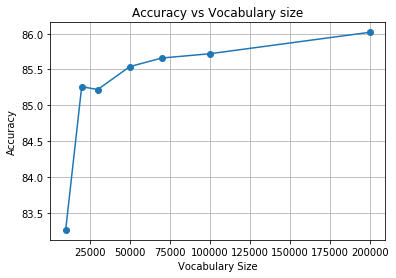

In [119]:
vocab=[10000,20000,30000,50000,70000,100000,200000]
plt.plot(vocab,val_hist,label='Validation accuracy',marker="o")
plt.xlabel('Vocabulary Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Vocabulary size')
plt.grid()

Here we see that the accuracy grows with the vocabulary size, which makes sense given that we only take a small fraction out of the $4$ million words that appear in the training set. However, when we use the $100.000$ or $200.000$ most frequent tokens, it becomes computationally intensive and therefore, we will continue with $50.000$ for the rest of our experiments. Such a choice offer a rather correct validation accuracy comparable to one achieved with $100.000$ or $200.000$ but with an upside of needing less computational time to get there.

## Learning curve for each vocabulary size we chose

The values are the ones we printed during training. (I forgot to include that in the function... I realized that too late and it was just way faster to copy paste the results rather than let that run for another hour again... Not elegant but that happens)

In [121]:
learning_curve_10k=[83.38, 86.26, 86.24,87.12,86.46,86.3,
                    85.84,86.4,86.2,85.78,84.78,84.86,
                    85.18,85.14,84.88,85.18,84.26,84.02,
                    84.38,84.28,84.3,83.92,83.12,84.08,
                    83.72,83.88,83.74,83.3,83.06,83.36,val_hist[0]]

learning_curve_20k=[83.74,86.46,86.54,87.16,87.04,86.7,
                    86.18,86.16,86.46,86.04,85.72,85.58,
                    85.46,85.32,84.92,85.08,85.32,84.92,
                    85.0,84.84,85.12,84.98,84.84,85.04,
                    85.16,84.98,85.06,85.32,85.2,85.24,val_hist[1]]

learning_curve_30k=[83.38,86.54,86.74,87.22,86.86,86.74,
                    87.08,86.1,86.1,85.8,85.24,85.46,
                    84.78,84.92,84.14,85.56,85.54,85.04,
                    85.24,85.18,85.2,85.26,85.42,85.22,
                    85.3,85.2,85.42,85.26,85.2,85.36,val_hist[2]]


learning_curve_50k=[84.7,85.04,85.58,87.74,86.4,86.24,
                    87.0,86.78,86.28,86.38,86.1,85.32,
                    85.6,85.52,85.28,85.64,85.48,85.72,
                    85.68,85.72,85.74,85.82,85.66,85.58,
                    85.66,85.74,85.6,85.64,85.62,85.62,val_hist[3]]


learning_curve_70k=[83.88,86.44,86.86,86.92,87.24,86.76,
                    87.16,86.6,86.1,86.32,86.68,86.08,
                    86.14,85.98,85.68,85.82,85.62,85.66,
                    85.7,85.68,85.52,85.66,85.62,85.8,
                    85.68,85.88,85.66,85.76,85.82,85.7,val_hist[4]]

learning_curve_100k=[82.74,86.58,87.84,87.3,86.84,87.2,
                     86.84,86.16,86.0,86.36,86.12,85.84,
                     85.4,85.84,85.36,85.84,85.9,85.8,
                     85.52,85.72,85.62,85.88,85.94,85.7,
                     85.72,85.74,85.66,85.74,85.66,85.72,val_hist[5]]

learning_curve_200k=[82.66,86.2,85.28,87.64,86.8,85.52,
                     86.3,85.6,85.88,86.2,86.1,85.26,
                     85.68,85.98,85.92,85.9,86.0,85.64,
                     85.82,85.88,85.88,85.82,85.76,85.8,
                     85.84,85.9,85.92,85.86,85.86,86.06,val_hist[6]]

learning_curves=[learning_curve_10k,learning_curve_20k,learning_curve_30k,learning_curve_50k,
                 learning_curve_70k,learning_curve_100k,learning_curve_200k]

In [125]:
it=0
iterations=[]
for i in range(0,10):
    it=i*625+1
    for j in range(3):
        it+=200
        iterations.append(it)
iterations.append(625*10)     
iterations

[201,
 401,
 601,
 826,
 1026,
 1226,
 1451,
 1651,
 1851,
 2076,
 2276,
 2476,
 2701,
 2901,
 3101,
 3326,
 3526,
 3726,
 3951,
 4151,
 4351,
 4576,
 4776,
 4976,
 5201,
 5401,
 5601,
 5826,
 6026,
 6226,
 6250]

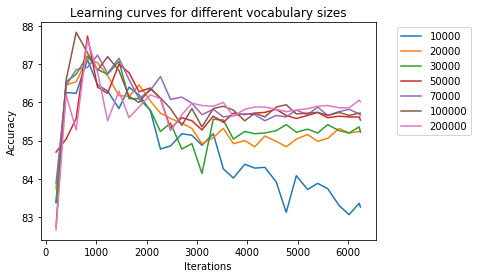

In [147]:
for i in range(len(learning_curves)):
    plt.plot(iterations,learning_curves[i],label=str(vocab[i]))
plt.legend(bbox_to_anchor=(1.3, 1))
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Learning curves for different vocabulary sizes')
plt.show()

We can therefore confirm that $50.000$ is a good choice since accuracy is similar to the one achieved with larger vocabularies yet we spare quite some computing time

# Embedding dimension

We here play with the embedding dimension and see how the $\textbf{validation}$ accuracy changes with this hyperparameter.

In [62]:
embedding_dims=[10,25,50,100,200,400]
val_hist_emb=[]
test_hist_emb=[]
for j in tqdm.trange(len(embedding_dims)):
    emb=embedding_dims[j]
    val_acc, test_acc=run(max_vocab_size=50000, emb_dim=emb)
    val_hist_emb.append(val_acc)
    test_hist_emb.append(test_acc)







  0%|          | 0/6 [00:00<?, ?it/s]

Epoch: [1/10], Step: [201/625], Validation Acc: 72.74
Epoch: [1/10], Step: [401/625], Validation Acc: 82.94
Epoch: [1/10], Step: [601/625], Validation Acc: 85.3
Epoch: [2/10], Step: [201/625], Validation Acc: 86.46
Epoch: [2/10], Step: [401/625], Validation Acc: 86.7
Epoch: [2/10], Step: [601/625], Validation Acc: 87.52
Epoch: [3/10], Step: [201/625], Validation Acc: 87.7
Epoch: [3/10], Step: [401/625], Validation Acc: 87.42
Epoch: [3/10], Step: [601/625], Validation Acc: 87.62
Epoch: [4/10], Step: [201/625], Validation Acc: 87.5
Epoch: [4/10], Step: [401/625], Validation Acc: 87.62
Epoch: [4/10], Step: [601/625], Validation Acc: 87.4
Epoch: [5/10], Step: [201/625], Validation Acc: 87.24
Epoch: [5/10], Step: [401/625], Validation Acc: 86.82
Epoch: [5/10], Step: [601/625], Validation Acc: 87.06
Epoch: [6/10], Step: [201/625], Validation Acc: 86.94
Epoch: [6/10], Step: [401/625], Validation Acc: 86.54
Epoch: [6/10], Step: [601/625], Validation Acc: 86.78
Epoch: [7/10], Step: [201/625], V






 17%|█▋        | 1/6 [03:29<17:26, 209.30s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 80.02
Epoch: [1/10], Step: [401/625], Validation Acc: 84.18
Epoch: [1/10], Step: [601/625], Validation Acc: 86.92
Epoch: [2/10], Step: [201/625], Validation Acc: 86.84
Epoch: [2/10], Step: [401/625], Validation Acc: 87.16
Epoch: [2/10], Step: [601/625], Validation Acc: 87.22
Epoch: [3/10], Step: [201/625], Validation Acc: 86.96
Epoch: [3/10], Step: [401/625], Validation Acc: 87.14
Epoch: [3/10], Step: [601/625], Validation Acc: 84.22
Epoch: [4/10], Step: [201/625], Validation Acc: 86.86
Epoch: [4/10], Step: [401/625], Validation Acc: 86.32
Epoch: [4/10], Step: [601/625], Validation Acc: 86.44
Epoch: [5/10], Step: [201/625], Validation Acc: 86.16
Epoch: [5/10], Step: [401/625], Validation Acc: 86.02
Epoch: [5/10], Step: [601/625], Validation Acc: 85.92
Epoch: [6/10], Step: [201/625], Validation Acc: 86.08
Epoch: [6/10], Step: [401/625], Validation Acc: 85.72
Epoch: [6/10], Step: [601/625], Validation Acc: 85.48
Epoch: [7/10], Step: [201/6






 33%|███▎      | 2/6 [08:12<15:25, 231.32s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 81.54
Epoch: [1/10], Step: [401/625], Validation Acc: 85.96
Epoch: [1/10], Step: [601/625], Validation Acc: 86.8
Epoch: [2/10], Step: [201/625], Validation Acc: 87.12
Epoch: [2/10], Step: [401/625], Validation Acc: 87.34
Epoch: [2/10], Step: [601/625], Validation Acc: 87.54
Epoch: [3/10], Step: [201/625], Validation Acc: 87.2
Epoch: [3/10], Step: [401/625], Validation Acc: 87.1
Epoch: [3/10], Step: [601/625], Validation Acc: 86.24
Epoch: [4/10], Step: [201/625], Validation Acc: 86.52
Epoch: [4/10], Step: [401/625], Validation Acc: 86.6
Epoch: [4/10], Step: [601/625], Validation Acc: 86.16
Epoch: [5/10], Step: [201/625], Validation Acc: 86.06
Epoch: [5/10], Step: [401/625], Validation Acc: 86.0
Epoch: [5/10], Step: [601/625], Validation Acc: 85.68
Epoch: [6/10], Step: [201/625], Validation Acc: 85.84
Epoch: [6/10], Step: [401/625], Validation Acc: 86.28
Epoch: [6/10], Step: [601/625], Validation Acc: 86.18
Epoch: [7/10], Step: [201/625], 






 50%|█████     | 3/6 [15:32<14:42, 294.01s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 83.54
Epoch: [1/10], Step: [401/625], Validation Acc: 86.74
Epoch: [1/10], Step: [601/625], Validation Acc: 85.24
Epoch: [2/10], Step: [201/625], Validation Acc: 86.94
Epoch: [2/10], Step: [401/625], Validation Acc: 86.98
Epoch: [2/10], Step: [601/625], Validation Acc: 87.16
Epoch: [3/10], Step: [201/625], Validation Acc: 86.86
Epoch: [3/10], Step: [401/625], Validation Acc: 86.34
Epoch: [3/10], Step: [601/625], Validation Acc: 86.9
Epoch: [4/10], Step: [201/625], Validation Acc: 86.56
Epoch: [4/10], Step: [401/625], Validation Acc: 86.02
Epoch: [4/10], Step: [601/625], Validation Acc: 85.84
Epoch: [5/10], Step: [201/625], Validation Acc: 86.28
Epoch: [5/10], Step: [401/625], Validation Acc: 85.96
Epoch: [5/10], Step: [601/625], Validation Acc: 86.04
Epoch: [6/10], Step: [201/625], Validation Acc: 86.02
Epoch: [6/10], Step: [401/625], Validation Acc: 85.6
Epoch: [6/10], Step: [601/625], Validation Acc: 86.08
Epoch: [7/10], Step: [201/625






 67%|██████▋   | 4/6 [27:41<14:08, 424.47s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 85.0
Epoch: [1/10], Step: [401/625], Validation Acc: 86.86
Epoch: [1/10], Step: [601/625], Validation Acc: 86.94
Epoch: [2/10], Step: [201/625], Validation Acc: 85.68
Epoch: [2/10], Step: [401/625], Validation Acc: 86.74
Epoch: [2/10], Step: [601/625], Validation Acc: 86.54
Epoch: [3/10], Step: [201/625], Validation Acc: 86.64
Epoch: [3/10], Step: [401/625], Validation Acc: 86.04
Epoch: [3/10], Step: [601/625], Validation Acc: 85.66
Epoch: [4/10], Step: [201/625], Validation Acc: 85.32
Epoch: [4/10], Step: [401/625], Validation Acc: 85.1
Epoch: [4/10], Step: [601/625], Validation Acc: 85.86
Epoch: [5/10], Step: [201/625], Validation Acc: 85.74
Epoch: [5/10], Step: [401/625], Validation Acc: 85.02
Epoch: [5/10], Step: [601/625], Validation Acc: 85.24
Epoch: [6/10], Step: [201/625], Validation Acc: 84.96
Epoch: [6/10], Step: [401/625], Validation Acc: 85.2
Epoch: [6/10], Step: [601/625], Validation Acc: 85.3
Epoch: [7/10], Step: [201/625],






 83%|████████▎ | 5/6 [49:14<11:24, 685.00s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 82.26
Epoch: [1/10], Step: [401/625], Validation Acc: 85.78
Epoch: [1/10], Step: [601/625], Validation Acc: 87.64
Epoch: [2/10], Step: [201/625], Validation Acc: 86.48
Epoch: [2/10], Step: [401/625], Validation Acc: 86.0
Epoch: [2/10], Step: [601/625], Validation Acc: 86.86
Epoch: [3/10], Step: [201/625], Validation Acc: 86.36
Epoch: [3/10], Step: [401/625], Validation Acc: 85.18
Epoch: [3/10], Step: [601/625], Validation Acc: 85.16
Epoch: [4/10], Step: [201/625], Validation Acc: 85.8
Epoch: [4/10], Step: [401/625], Validation Acc: 84.6
Epoch: [4/10], Step: [601/625], Validation Acc: 85.82
Epoch: [5/10], Step: [201/625], Validation Acc: 85.46
Epoch: [5/10], Step: [401/625], Validation Acc: 84.98
Epoch: [5/10], Step: [601/625], Validation Acc: 85.4
Epoch: [6/10], Step: [201/625], Validation Acc: 85.22
Epoch: [6/10], Step: [401/625], Validation Acc: 85.16
Epoch: [6/10], Step: [601/625], Validation Acc: 84.7
Epoch: [7/10], Step: [201/625], 






100%|██████████| 6/6 [1:28:32<00:00, 1187.10s/it]






## Accuracy evolution with the embedding size

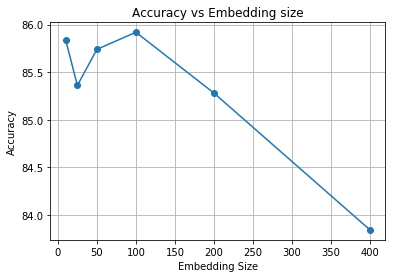

In [130]:
plt.plot(embedding_dims,val_hist_emb,label='Validation accuracy',marker="o")
plt.xlabel('Embedding Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Embedding size')
plt.grid()

We will therefore choose an embedding size of $100$.

## Learning curve for each embedding size we chose

In [141]:
learning_curve_emb10=[72.74,82.94,85.3,86.46,86.7,
                   87.52,87.7,87.42,87.62,87.5,
                   87.62,87.4,87.24,86.82,87.06,
                   86.94,86.54,86.78,86.64,86.18,
                   86.16,86.04,85.96,86.16,85.86,
                   86.16,85.98,85.8,85.68,85.78, val_hist_emb[0]]


learning_curve_emb25=[80.02,84.18,86.92,86.84,87.16,
                   87.22,86.96,87.14,84.22,86.86,
                   86.32,86.44,86.16,86.02,85.92,
                   86.08,85.72,85.48,85.42,85.6,
                   85.5,85.5,85.54,85.26,85.28,
                   85.26,85.36,85.26,85.22,85.28,val_hist_emb[1]]


learning_curve_emb50=[81.54,85.96,86.8,87.12,87.34,
                   87.54,87.2,87.1,86.24,86.52,
                   86.6,86.16,86.06,86.0,85.68,
                   85.84,86.28,86.18,85.98,85.8,
                   85.96,85.88,85.78,85.82,85.82,
                   85.88,85.92,85.84,85.74,85.94,val_hist_emb[2]]


learning_curve_emb100=[83.54,86.74,85.24,86.94,86.98,
                    87.16,86.86,86.34,86.9,86.56,
                    86.02,85.84,86.28,85.96,86.04,
                    86.02,85.6,86.08,85.98,85.88,
                    85.76,85.9,85.86,86.02,86.02,
                    85.96,86.0,85.92,85.9,85.94,val_hist_emb[3]]

learning_curve_emb200=[85.0,86.86,86.94,85.68,86.74,
                    86.54,86.64,86.04,85.66,85.32,
                    85.1,85.86,85.74,85.02,85.24,
                    84.96,85.2,85.3,85.18,85.3,
                    84.8,85.08,85.06,85.18,85.24,
                    85.28,85.18,85.28,85.22,85.3,val_hist_emb[4]]

learning_curve_emb400=[82.26,85.78,87.64,86.48,86.0,
                    86.86,86.36,85.18,85.16,85.8,
                    84.6,85.82,85.46,84.98,85.4,
                    85.22,85.16,84.7,84.68,84.3,
                    84.08,84.46,83.68,84.08,84.34,
                    83.56,83.74,84.16,84.1,84.16,val_hist_emb[5]]

learning_curves_embedding=[learning_curve_emb10,learning_curve_emb25,learning_curve_emb50,
                           learning_curve_emb100,learning_curve_emb200,learning_curve_emb400]

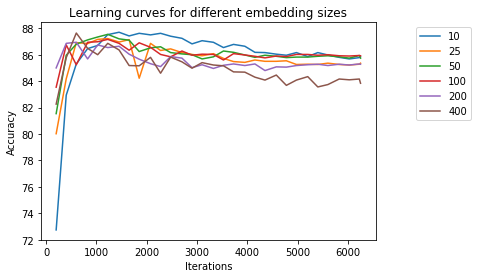

In [146]:
for i in range(len(learning_curves_embedding)):
    plt.plot(iterations,learning_curves_embedding[i],label=str(embedding_dims[i]))
plt.legend(bbox_to_anchor=(1.3, 1))
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Learning curves for different embedding sizes')
plt.show()

This confirms that 100 is a good choice since it achieves a better accuracy and accuracy seems to converge faster for this model

# Max sentence length

In [86]:
sentence_lengths=[10,25,50,100,200,400,800]
val_hist_sentence=[]
test_hist_sentence=[]
for j in tqdm.trange(len(sentence_lengths)):
    m=sentence_lengths[j]
    val_acc, test_acc=run(max_vocab_size=50000,MAX_SENTENCE_LENGTH=m, emb_dim=100)
    val_hist_sentence.append(val_acc)
    test_hist_sentence.append(test_acc)








  0%|          | 0/7 [00:00<?, ?it/s]

Epoch: [1/10], Step: [201/625], Validation Acc: 62.52
Epoch: [1/10], Step: [401/625], Validation Acc: 64.54
Epoch: [1/10], Step: [601/625], Validation Acc: 63.58
Epoch: [2/10], Step: [201/625], Validation Acc: 66.3
Epoch: [2/10], Step: [401/625], Validation Acc: 66.82
Epoch: [2/10], Step: [601/625], Validation Acc: 67.94
Epoch: [3/10], Step: [201/625], Validation Acc: 67.94
Epoch: [3/10], Step: [401/625], Validation Acc: 67.24
Epoch: [3/10], Step: [601/625], Validation Acc: 67.34
Epoch: [4/10], Step: [201/625], Validation Acc: 66.96
Epoch: [4/10], Step: [401/625], Validation Acc: 65.74
Epoch: [4/10], Step: [601/625], Validation Acc: 67.44
Epoch: [5/10], Step: [201/625], Validation Acc: 66.42
Epoch: [5/10], Step: [401/625], Validation Acc: 66.94
Epoch: [5/10], Step: [601/625], Validation Acc: 67.28
Epoch: [6/10], Step: [201/625], Validation Acc: 66.34
Epoch: [6/10], Step: [401/625], Validation Acc: 66.32
Epoch: [6/10], Step: [601/625], Validation Acc: 67.34
Epoch: [7/10], Step: [201/625






 14%|█▍        | 1/7 [08:06<48:38, 486.39s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 67.74
Epoch: [1/10], Step: [401/625], Validation Acc: 71.98
Epoch: [1/10], Step: [601/625], Validation Acc: 72.96
Epoch: [2/10], Step: [201/625], Validation Acc: 70.8
Epoch: [2/10], Step: [401/625], Validation Acc: 71.02
Epoch: [2/10], Step: [601/625], Validation Acc: 72.6
Epoch: [3/10], Step: [201/625], Validation Acc: 71.44
Epoch: [3/10], Step: [401/625], Validation Acc: 71.56
Epoch: [3/10], Step: [601/625], Validation Acc: 71.3
Epoch: [4/10], Step: [201/625], Validation Acc: 70.46
Epoch: [4/10], Step: [401/625], Validation Acc: 71.2
Epoch: [4/10], Step: [601/625], Validation Acc: 70.84
Epoch: [5/10], Step: [201/625], Validation Acc: 70.6
Epoch: [5/10], Step: [401/625], Validation Acc: 69.6
Epoch: [5/10], Step: [601/625], Validation Acc: 69.76
Epoch: [6/10], Step: [201/625], Validation Acc: 69.64
Epoch: [6/10], Step: [401/625], Validation Acc: 70.54
Epoch: [6/10], Step: [601/625], Validation Acc: 70.24
Epoch: [7/10], Step: [201/625], V






 29%|██▊       | 2/7 [16:52<41:31, 498.20s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 74.28
Epoch: [1/10], Step: [401/625], Validation Acc: 76.62
Epoch: [1/10], Step: [601/625], Validation Acc: 76.94
Epoch: [2/10], Step: [201/625], Validation Acc: 77.28
Epoch: [2/10], Step: [401/625], Validation Acc: 77.04
Epoch: [2/10], Step: [601/625], Validation Acc: 77.24
Epoch: [3/10], Step: [201/625], Validation Acc: 76.8
Epoch: [3/10], Step: [401/625], Validation Acc: 77.3
Epoch: [3/10], Step: [601/625], Validation Acc: 75.92
Epoch: [4/10], Step: [201/625], Validation Acc: 76.48
Epoch: [4/10], Step: [401/625], Validation Acc: 76.12
Epoch: [4/10], Step: [601/625], Validation Acc: 75.14
Epoch: [5/10], Step: [201/625], Validation Acc: 75.74
Epoch: [5/10], Step: [401/625], Validation Acc: 74.82
Epoch: [5/10], Step: [601/625], Validation Acc: 75.58
Epoch: [6/10], Step: [201/625], Validation Acc: 74.72
Epoch: [6/10], Step: [401/625], Validation Acc: 74.9
Epoch: [6/10], Step: [601/625], Validation Acc: 74.08
Epoch: [7/10], Step: [201/625]






 43%|████▎     | 3/7 [26:33<34:52, 523.14s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 78.8
Epoch: [1/10], Step: [401/625], Validation Acc: 81.92
Epoch: [1/10], Step: [601/625], Validation Acc: 83.5
Epoch: [2/10], Step: [201/625], Validation Acc: 83.52
Epoch: [2/10], Step: [401/625], Validation Acc: 82.64
Epoch: [2/10], Step: [601/625], Validation Acc: 82.96
Epoch: [3/10], Step: [201/625], Validation Acc: 83.02
Epoch: [3/10], Step: [401/625], Validation Acc: 82.44
Epoch: [3/10], Step: [601/625], Validation Acc: 81.68
Epoch: [4/10], Step: [201/625], Validation Acc: 82.32
Epoch: [4/10], Step: [401/625], Validation Acc: 82.42
Epoch: [4/10], Step: [601/625], Validation Acc: 81.52
Epoch: [5/10], Step: [201/625], Validation Acc: 81.92
Epoch: [5/10], Step: [401/625], Validation Acc: 82.02
Epoch: [5/10], Step: [601/625], Validation Acc: 81.36
Epoch: [6/10], Step: [201/625], Validation Acc: 81.74
Epoch: [6/10], Step: [401/625], Validation Acc: 81.74
Epoch: [6/10], Step: [601/625], Validation Acc: 81.32
Epoch: [7/10], Step: [201/625






 57%|█████▋    | 4/7 [38:28<29:02, 580.76s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 83.96
Epoch: [1/10], Step: [401/625], Validation Acc: 86.54
Epoch: [1/10], Step: [601/625], Validation Acc: 88.0
Epoch: [2/10], Step: [201/625], Validation Acc: 87.36
Epoch: [2/10], Step: [401/625], Validation Acc: 87.06
Epoch: [2/10], Step: [601/625], Validation Acc: 86.94
Epoch: [3/10], Step: [201/625], Validation Acc: 86.82
Epoch: [3/10], Step: [401/625], Validation Acc: 86.52
Epoch: [3/10], Step: [601/625], Validation Acc: 85.76
Epoch: [4/10], Step: [201/625], Validation Acc: 86.0
Epoch: [4/10], Step: [401/625], Validation Acc: 85.92
Epoch: [4/10], Step: [601/625], Validation Acc: 85.52
Epoch: [5/10], Step: [201/625], Validation Acc: 84.74
Epoch: [5/10], Step: [401/625], Validation Acc: 85.34
Epoch: [5/10], Step: [601/625], Validation Acc: 85.26
Epoch: [6/10], Step: [201/625], Validation Acc: 85.52
Epoch: [6/10], Step: [401/625], Validation Acc: 85.56
Epoch: [6/10], Step: [601/625], Validation Acc: 85.46
Epoch: [7/10], Step: [201/625






 71%|███████▏  | 5/7 [51:50<21:33, 646.97s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 85.16
Epoch: [1/10], Step: [401/625], Validation Acc: 87.78
Epoch: [1/10], Step: [601/625], Validation Acc: 88.16
Epoch: [2/10], Step: [201/625], Validation Acc: 88.48
Epoch: [2/10], Step: [401/625], Validation Acc: 88.64
Epoch: [2/10], Step: [601/625], Validation Acc: 88.7
Epoch: [3/10], Step: [201/625], Validation Acc: 88.64
Epoch: [3/10], Step: [401/625], Validation Acc: 88.12
Epoch: [3/10], Step: [601/625], Validation Acc: 88.22
Epoch: [4/10], Step: [201/625], Validation Acc: 87.6
Epoch: [4/10], Step: [401/625], Validation Acc: 87.14
Epoch: [4/10], Step: [601/625], Validation Acc: 87.54
Epoch: [5/10], Step: [201/625], Validation Acc: 87.42
Epoch: [5/10], Step: [401/625], Validation Acc: 87.22
Epoch: [5/10], Step: [601/625], Validation Acc: 87.38
Epoch: [6/10], Step: [201/625], Validation Acc: 87.3
Epoch: [6/10], Step: [401/625], Validation Acc: 87.28
Epoch: [6/10], Step: [601/625], Validation Acc: 87.38
Epoch: [7/10], Step: [201/625]






 86%|████████▌ | 6/7 [1:05:39<11:41, 701.58s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 85.9
Epoch: [1/10], Step: [401/625], Validation Acc: 86.68
Epoch: [1/10], Step: [601/625], Validation Acc: 89.4
Epoch: [2/10], Step: [201/625], Validation Acc: 89.34
Epoch: [2/10], Step: [401/625], Validation Acc: 88.7
Epoch: [2/10], Step: [601/625], Validation Acc: 88.92
Epoch: [3/10], Step: [201/625], Validation Acc: 88.42
Epoch: [3/10], Step: [401/625], Validation Acc: 88.18
Epoch: [3/10], Step: [601/625], Validation Acc: 88.22
Epoch: [4/10], Step: [201/625], Validation Acc: 88.1
Epoch: [4/10], Step: [401/625], Validation Acc: 88.06
Epoch: [4/10], Step: [601/625], Validation Acc: 87.54
Epoch: [5/10], Step: [201/625], Validation Acc: 88.04
Epoch: [5/10], Step: [401/625], Validation Acc: 87.96
Epoch: [5/10], Step: [601/625], Validation Acc: 88.18
Epoch: [6/10], Step: [201/625], Validation Acc: 88.06
Epoch: [6/10], Step: [401/625], Validation Acc: 87.9
Epoch: [6/10], Step: [601/625], Validation Acc: 87.84
Epoch: [7/10], Step: [201/625], 






100%|██████████| 7/7 [1:19:30<00:00, 740.39s/it]






## Accuracy evolution with the max sentence length

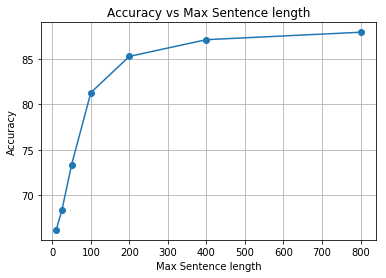

In [143]:
plt.plot(sentence_lengths,val_hist_sentence,label='Validation accuracy',marker="o")
plt.xlabel('Max Sentence length')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Sentence length')
plt.grid()

Here we make a similar call to the one made for vocabulary size. A max sentence length of 200 allows to get to a decent result without needing as much computational power so we'll go with 200. We could also have chosen 400 since the curve seems to flatten after 400.

## Learning curve for each sentence length we chose

In [144]:
learning_curve_sentence10=[62.52,64.54,63.58,66.3,
                           66.82,67.94,67.94,67.24,
                           67.34,66.96,65.74,67.44,
                           66.42,66.94,67.28,66.34,
                           66.32,67.34,66.74,67.2,
                           65.76,66.06,66.64,65.9,
                           66.56,66.14,66.7,66.96,
                           66.12,66.08,val_hist_sentence[0]]

learning_curve_sentence25=[67.74,71.98,72.96,70.8,
                           71.02,72.6,71.44,71.56,
                           71.3,70.46,71.2,70.84,
                           70.6,69.6,69.76,69.64,
                           70.54,70.24,69.58,69.56,
                           69.9,69.2,68.34,69.1,69.18,
                           69.16,68.88,69.02,68.78,69.16,val_hist_sentence[1]]


learning_curve_sentence50=[74.28,76.62,76.94,77.28,
                           77.04,77.24,76.8,77.3,
                           75.92,76.48,76.12,75.14,
                           75.74,74.82,75.58,74.72,
                           74.9,74.08,74.26,73.42,
                           73.66,74.04,74.12,73.7,
                           73.62,73.28,73.66,73.76,
                           73.62,73.42,val_hist_sentence[2]]



learning_curve_sentence100=[78.8,81.92,83.5,83.52,
                            82.64,82.96,83.02,82.44,
                            81.68,82.32,82.42,81.52,
                            81.92,82.02,81.36,81.74,
                            81.74,81.32,81.4,81.24,
                            81.16,81.16,81.32,81.4,
                            81.34,81.32,81.08,81.24,
                            81.28,81.18,val_hist_sentence[3]]

learning_curve_sentence200=[83.96,86.54,88.0,87.36,
                            87.06,86.94,86.82,86.52,
                            85.76,86.0,85.92,85.52,84.74,
                            85.34,85.26,85.52,85.56,
                            85.46,85.4,85.42,85.5,85.42,
                            85.44,85.38,85.38,85.32,85.3,
                            85.38,85.4,85.4,val_hist_sentence[4]]

learning_curve_sentence400=[85.16,87.78,88.16,88.48,
                            88.64,88.7,88.64,88.12,
                            88.22,87.6,87.14,87.54,87.42,
                            87.22,87.38,87.3,87.28,87.38,
                            87.22,87.22,87.26,87.2,87.42,
                            87.12,87.08,87.26,87.34,87.2,
                            87.24,87.18,val_hist_sentence[5]]

learning_curve_sentence800=[85.9,86.68,89.4,89.34,88.7,
                            88.92,88.42,88.18,88.22,
                            88.1,88.06,87.54,88.04,
                            87.96,88.18,88.06,87.9,87.84,
                            87.98,87.88,87.74,87.88,
                            87.88,87.92,87.86,87.82,87.84,
                            87.88,87.96,87.76,val_hist_sentence[6]]
learning_curves_sentences=[learning_curve_sentence10,learning_curve_sentence25,learning_curve_sentence50,
                          learning_curve_sentence100,learning_curve_sentence200,learning_curve_sentence400,
                          learning_curve_sentence800]

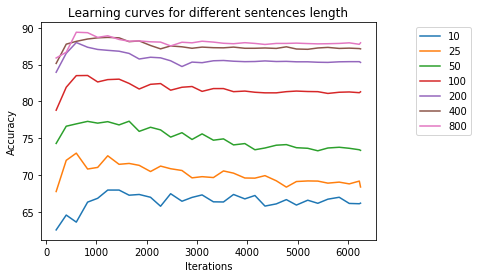

In [145]:
for i in range(len(learning_curves_sentences)):
    plt.plot(iterations,learning_curves_sentences[i],label=str(sentence_lengths[i]))
plt.legend(bbox_to_anchor=(1.3, 1))
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Learning curves for different sentences length')
plt.show()

Here for the first time we have a parameter for which learning curves are all separated. However we notice that the differences in accuracy are lower as the sentences length decreases. We will choose 200 to compute faster but for the final test of our model we'll go for 400.

# 2-grams

Here we redo all the previous tokenization we did for 1-gram but for 2 grams, 3 grams and 4 grams

In [80]:
# Let's write the tokenization function 

import spacy
import string

# Load English tokenizer, tagger, parser, NER and word vectors
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

def tokenize(sent):
    tokens = tokenizer(sent)
    return [token.text.lower() for token in tokens if (token.text not in punctuations)]


# lowercase and remove punctuation
def tokenize_n_grams(sent,n):
    tokens = tokenize(sent)
    final=[]
    for i in range(len(tokens)-n+1):
        gram=tokens[i]
        for j in range(1,n):
            gram=gram+' '+tokens[i+j]
        final.append(gram)
    return final

# Example
tokens = tokenize_n_grams(u'Apple is looking at buying U.K. startup for $1 billion',2)
print (tokens)

['apple is', 'is looking', 'looking at', 'at buying', 'buying u.k.', 'u.k. startup', 'startup for', 'for 1', '1 billion']


In [81]:
import pickle as pkl

def tokenize_dataset_ngrams(dataset,n):
    token_dataset = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens = []
    
    for sample in dataset:
        tokens = tokenize_n_grams(sample,n)
        token_dataset.append(tokens)
        all_tokens += tokens

    return token_dataset, all_tokens

# val set tokens
print ("Tokenizing val data")
val_data_tokens_2grams, _ = tokenize_dataset_ngrams(val_data,2)
pkl.dump(val_data_tokens_2grams, open("val_data_tokens_2grams.p", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens_2grams, _ = tokenize_dataset_ngrams(test_data,2)
pkl.dump(test_data_tokens_2grams, open("test_data_tokens_2grams.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens_2grams, all_train_tokens_2grams = tokenize_dataset_ngrams(train_data,2)
pkl.dump(train_data_tokens_2grams, open("train_data_tokens_2grams.p", "wb"))
pkl.dump(all_train_tokens_2grams, open("all_train_tokens_2grams.p", "wb"))



Tokenizing val data
Tokenizing test data
Tokenizing train data


In [83]:
tokens = tokenize_n_grams(u'Apple is looking at buying U.K. startup for $1 billion',3)
print (tokens)

['apple is looking', 'is looking at', 'looking at buying', 'at buying u.k.', 'buying u.k. startup', 'u.k. startup for', 'startup for 1', 'for 1 billion']


# 3 grams

In [84]:

# val set tokens
print ("Tokenizing val data")
val_data_tokens_3grams, _ = tokenize_dataset_ngrams(val_data,3)
pkl.dump(val_data_tokens_3grams, open("val_data_tokens_3grams.p", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens_3grams, _ = tokenize_dataset_ngrams(test_data,3)
pkl.dump(test_data_tokens_3grams, open("test_data_tokens_3grams.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens_3grams, all_train_tokens_3grams = tokenize_dataset_ngrams(train_data,3)
pkl.dump(train_data_tokens_3grams, open("train_data_tokens_3grams.p", "wb"))
pkl.dump(all_train_tokens_3grams, open("all_train_tokens_3grams.p", "wb"))




Tokenizing val data
Tokenizing test data
Tokenizing train data


# 4 grams

In [85]:
# val set tokens
print ("Tokenizing val data")
val_data_tokens_4grams, _ = tokenize_dataset_ngrams(val_data,4)
pkl.dump(val_data_tokens_4grams, open("val_data_tokens_4grams.p", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens_4grams, _ = tokenize_dataset_ngrams(test_data,4)
pkl.dump(test_data_tokens_4grams, open("test_data_tokens_4grams.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens_4grams, all_train_tokens_4grams = tokenize_dataset_ngrams(train_data,4)
pkl.dump(train_data_tokens_4grams, open("train_data_tokens_4grams.p", "wb"))
pkl.dump(all_train_tokens_4grams, open("all_train_tokens_4grams.p", "wb"))

Tokenizing val data
Tokenizing test data
Tokenizing train data


# Create a function to play with hyperparameters along with n parameter (n-grams)

In [7]:
from collections import Counter
import os
import random
import math
import tqdm
import numpy as np


# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1
def run_ngrams(val_data_tokens_ngrams,train_data_tokens_ngrams,test_data_tokens_ngrams,all_train_tokens_ngrams,
               max_vocab_size=50000, MAX_SENTENCE_LENGTH = 200, BATCH_SIZE = 32, 
               emb_dim = 100, learning_rate = 0.01, num_epochs = 10):


    def build_vocab(all_tokens):
        # Returns:
        # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
        # token2id: dictionary where keys represent tokens and corresponding values represent indices
        token_counter = Counter(all_tokens)
        vocab, count = zip(*token_counter.most_common(max_vocab_size))
        id2token = list(vocab)
        token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
        id2token = ['<pad>', '<unk>'] + id2token
        token2id['<pad>'] = PAD_IDX 
        token2id['<unk>'] = UNK_IDX
        return token2id, id2token

    # convert token to id in the dataset
    def token2index_dataset(tokens_data):
        indices_data = []
        for tokens in tokens_data:
            index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
            indices_data.append(index_list)
        return indices_data


    import numpy as np
    import torch
    from torch.utils.data import Dataset

    class NewsGroupDataset(Dataset):
        """
        Class that represents a train/validation/test dataset that's readable for PyTorch
        Note that this class inherits torch.utils.data.Dataset
        """

        def __init__(self, data_list, target_list):
            """
            @param data_list: list of newsgroup tokens 
            @param target_list: list of newsgroup targets 

            """
            self.data_list = data_list
            self.target_list = target_list
            assert (len(self.data_list) == len(self.target_list))

        def __len__(self):
            return len(self.data_list)

        def __getitem__(self, key):
            """
            Triggered when you call dataset[i]
            """

            token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
            label = self.target_list[key]
            return [token_idx, len(token_idx), label]

    def newsgroup_collate_func(batch):
        """
        Customized function for DataLoader that dynamically pads the batch so that all 
        data have the same length
        """
        data_list = []
        label_list = []
        length_list = []
        #print("collate batch: ", batch[0][0])
        #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
        for datum in batch:
            label_list.append(datum[2])
            length_list.append(datum[1])
        # padding
        for datum in batch:
            padded_vec = np.pad(np.array(datum[0]), 
                                    pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                    mode="constant", constant_values=0)
            data_list.append(padded_vec)
        return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

    "change here"
    token2id, id2token = build_vocab(all_train_tokens_ngrams)

    # Lets check the dictionary by loading random token from it

    random_token_id = random.randint(0, len(id2token)-1)
    random_token = id2token[random_token_id]

    #print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
    #print ("Token {}; token id {}".format(random_token, token2id[random_token]))

    # convert token to id in the dataset
    "change here"

    train_data_indices = token2index_dataset(train_data_tokens_ngrams)
    val_data_indices = token2index_dataset(val_data_tokens_ngrams)
    test_data_indices = token2index_dataset(test_data_tokens_ngrams)

    # double checking
    #print ("Train dataset size is {}".format(len(train_data_indices)))
    #print ("Val dataset size is {}".format(len(val_data_indices)))
    #print ("Test dataset size is {}".format(len(test_data_indices)))

    import numpy as np
    import torch
    from torch.utils.data import Dataset

    class NewsGroupDataset(Dataset):
        """
        Class that represents a train/validation/test dataset that's readable for PyTorch
        Note that this class inherits torch.utils.data.Dataset
        """

        def __init__(self, data_list, target_list):
            """
            @param data_list: list of newsgroup tokens 
            @param target_list: list of newsgroup targets 

            """
            self.data_list = data_list
            self.target_list = target_list
            assert (len(self.data_list) == len(self.target_list))

        def __len__(self):
            return len(self.data_list)

        def __getitem__(self, key):
            """
            Triggered when you call dataset[i]
            """

            token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
            label = self.target_list[key]
            return [token_idx, len(token_idx), label]

    def newsgroup_collate_func(batch):
        """
        Customized function for DataLoader that dynamically pads the batch so that all 
        data have the same length
        """
        data_list = []
        label_list = []
        length_list = []
        #print("collate batch: ", batch[0][0])
        #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
        for datum in batch:
            label_list.append(datum[2])
            length_list.append(datum[1])
        # padding
        for datum in batch:
            padded_vec = np.pad(np.array(datum[0]), 
                                    pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                    mode="constant", constant_values=0)
            data_list.append(padded_vec)
        return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

    # create pytorch dataloader
    #train_loader = NewsGroupDataset(train_data_indices, train_targets)
    #val_loader = NewsGroupDataset(val_data_indices, val_targets)
    #test_loader = NewsGroupDataset(test_data_indices, test_targets)

    train_dataset = NewsGroupDataset(train_data_indices, train_target)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    val_dataset = NewsGroupDataset(val_data_indices, val_target)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    test_dataset = NewsGroupDataset(test_data_indices, test_target)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=False)

    #for i, (data, lengths, labels) in enumerate(train_loader):
    #    print (data)
    #    print (labels)
    #    break

    # First import torch related libraries
    import torch
    import torch.nn as nn
    import torch.nn.functional as F

    class BagOfWords(nn.Module):
        """
        BagOfWords classification model
        """
        def __init__(self, vocab_size, emb_dim):
            """
            @param vocab_size: size of the vocabulary. 
            @param emb_dim: size of the word embedding
            """
            super(BagOfWords, self).__init__()
            # pay attention to padding_idx 
            self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
            self.linear = nn.Linear(emb_dim,20)

        def forward(self, data, length):
            """

            @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
                review that is represented using n-gram index. Note that they are padded to have same length.
            @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
                length of each sentences in the data.
            """
            out = self.embed(data)
            out = torch.sum(out, dim=1)
            out /= length.view(length.size()[0],1).expand_as(out).float()

            # return logits
            out = self.linear(out.float())
            return out

    model = BagOfWords(len(id2token), emb_dim)


    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss()  
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Function for testing the model
    def test_model(loader, model):
        """
        Help function that tests the model's performance on a dataset
        @param: loader - data loader for the dataset to test against
        """
        correct = 0
        total = 0
        model.eval()
        for data, lengths, labels in loader:
            data_batch, length_batch, label_batch = data, lengths, labels
            outputs = F.softmax(model(data_batch, length_batch), dim=1)
            predicted = outputs.max(1, keepdim=True)[1]

            total += labels.size(0)
            correct += predicted.eq(labels.view_as(predicted)).sum().item()
        return (100 * correct / total)

    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 200 iterations
            if i > 0 and i % 200 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))
    return test_model(val_loader, model), test_model(test_loader, model)



# Run the function with the hyperparameters chosen before

i.e. 

1) Vocabulary size $=50.000$

2) Embedding size $=100$

3) $10$ epochs

4) Max sentence length $=200$

AND we modify $n$ in $n-$grams 

In [153]:
val_acc2,test_acc2=run_ngrams(val_data_tokens_2grams,train_data_tokens_2grams,
                              test_data_tokens_2grams,all_train_tokens_2grams)

Epoch: [1/10], Step: [201/625], Validation Acc: 82.14
Epoch: [1/10], Step: [401/625], Validation Acc: 85.34
Epoch: [1/10], Step: [601/625], Validation Acc: 84.76
Epoch: [2/10], Step: [201/625], Validation Acc: 85.44
Epoch: [2/10], Step: [401/625], Validation Acc: 85.32
Epoch: [2/10], Step: [601/625], Validation Acc: 84.62
Epoch: [3/10], Step: [201/625], Validation Acc: 85.04
Epoch: [3/10], Step: [401/625], Validation Acc: 85.24
Epoch: [3/10], Step: [601/625], Validation Acc: 85.42
Epoch: [4/10], Step: [201/625], Validation Acc: 85.48
Epoch: [4/10], Step: [401/625], Validation Acc: 85.56
Epoch: [4/10], Step: [601/625], Validation Acc: 85.44
Epoch: [5/10], Step: [201/625], Validation Acc: 85.4
Epoch: [5/10], Step: [401/625], Validation Acc: 85.38
Epoch: [5/10], Step: [601/625], Validation Acc: 85.44
Epoch: [6/10], Step: [201/625], Validation Acc: 85.44
Epoch: [6/10], Step: [401/625], Validation Acc: 85.42
Epoch: [6/10], Step: [601/625], Validation Acc: 85.46
Epoch: [7/10], Step: [201/625

In [154]:
val_acc3,test_acc3=run_ngrams(val_data_tokens_3grams,train_data_tokens_3grams,
                              test_data_tokens_3grams,all_train_tokens_3grams)

Epoch: [1/10], Step: [201/625], Validation Acc: 76.32
Epoch: [1/10], Step: [401/625], Validation Acc: 76.68
Epoch: [1/10], Step: [601/625], Validation Acc: 77.14
Epoch: [2/10], Step: [201/625], Validation Acc: 81.88
Epoch: [2/10], Step: [401/625], Validation Acc: 81.68
Epoch: [2/10], Step: [601/625], Validation Acc: 80.16
Epoch: [3/10], Step: [201/625], Validation Acc: 81.48
Epoch: [3/10], Step: [401/625], Validation Acc: 81.46
Epoch: [3/10], Step: [601/625], Validation Acc: 81.18
Epoch: [4/10], Step: [201/625], Validation Acc: 80.92
Epoch: [4/10], Step: [401/625], Validation Acc: 80.44
Epoch: [4/10], Step: [601/625], Validation Acc: 80.6
Epoch: [5/10], Step: [201/625], Validation Acc: 80.68
Epoch: [5/10], Step: [401/625], Validation Acc: 80.6
Epoch: [5/10], Step: [601/625], Validation Acc: 80.52
Epoch: [6/10], Step: [201/625], Validation Acc: 80.52
Epoch: [6/10], Step: [401/625], Validation Acc: 80.56
Epoch: [6/10], Step: [601/625], Validation Acc: 80.46
Epoch: [7/10], Step: [201/625]

In [155]:
val_acc4,test_acc4=run_ngrams(val_data_tokens_4grams,train_data_tokens_4grams,
                              test_data_tokens_4grams,all_train_tokens_4grams)

Epoch: [1/10], Step: [201/625], Validation Acc: 51.56
Epoch: [1/10], Step: [401/625], Validation Acc: 72.62
Epoch: [1/10], Step: [601/625], Validation Acc: 72.22
Epoch: [2/10], Step: [201/625], Validation Acc: 75.74
Epoch: [2/10], Step: [401/625], Validation Acc: 75.26
Epoch: [2/10], Step: [601/625], Validation Acc: 75.98
Epoch: [3/10], Step: [201/625], Validation Acc: 75.4
Epoch: [3/10], Step: [401/625], Validation Acc: 72.92
Epoch: [3/10], Step: [601/625], Validation Acc: 75.24
Epoch: [4/10], Step: [201/625], Validation Acc: 74.84
Epoch: [4/10], Step: [401/625], Validation Acc: 74.78
Epoch: [4/10], Step: [601/625], Validation Acc: 73.54
Epoch: [5/10], Step: [201/625], Validation Acc: 74.08
Epoch: [5/10], Step: [401/625], Validation Acc: 74.16
Epoch: [5/10], Step: [601/625], Validation Acc: 74.44
Epoch: [6/10], Step: [201/625], Validation Acc: 73.32
Epoch: [6/10], Step: [401/625], Validation Acc: 74.26
Epoch: [6/10], Step: [601/625], Validation Acc: 73.8
Epoch: [7/10], Step: [201/625]

In [156]:
val_acc=(val_hist_sentence[4]) #value achieved for 1 gram with those same values for the hyperparameters

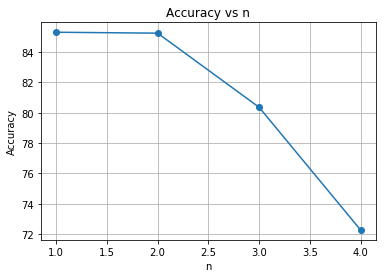

In [192]:
plt.plot([1,2,3,4],[val_acc,val_acc2,val_acc3,val_acc4],label='Validation accuracy',marker="o")
plt.xlabel('n')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n')
plt.grid()

In [160]:
print('The accuracy achieved with 1gram is: '+str(val_acc))
print('The accuracy achieved with 2gram is: '+str(val_acc2))
print('The accuracy achieved with 3gram is: '+str(val_acc3))
print('The accuracy achieved with 4gram is: '+str(val_acc4))

The accuracy achieved with 1gram is: 85.3
The accuracy achieved with 2gram is: 85.24
The accuracy achieved with 3gram is: 80.36
The accuracy achieved with 4gram is: 72.28


We see that 3 and 4 grams don't perform as well and it's a quite significant difference. Therefore, for the follwing hyperparameters, we'll focus on 2-grams and see if 2 grams can outperform 1-gram for some hyperparameters values.

## Learning curves depending on n

In [167]:
learning_curve_2grams=[82.14,85.34,84.76,85.44,
                       85.32,84.62,85.04,85.24,
                       85.42,85.48,85.56,85.44,
                       85.4,85.38,85.44,85.44,
                       85.42,85.46,85.5,85.28,
                       85.26,85.32,85.34,85.22,
                       85.3,85.36,85.2,85.24,85.26,85.22,val_acc2]

learning_curve_3grams=[76.32,76.68,77.14,81.88,
                       81.68,80.16,81.48,81.46,
                       81.18,80.92,80.44,80.6,
                       80.68,80.6,80.52,80.52,
                       80.56,80.46,80.32,80.44,
                       80.48,80.62,79.12,80.58,
                       80.44,80.46,80.22,80.16,80.32,80.36,val_acc3]

learning_curve_4grams=[51.56,72.62,72.22,75.74,75.26,
                       75.98,75.4,72.92,75.24,74.84,
                       74.78,73.54,74.08,74.16,74.44,
                       73.32,74.26,73.8,74.04,74.02,
                       73.88,71.88,73.06,73.86,73.82,
                       73.14,73.28,71.24,72.1,72.94,val_acc4]

curves_ngrams=[learning_curve_sentence200,learning_curve_2grams,learning_curve_3grams,learning_curve_4grams]

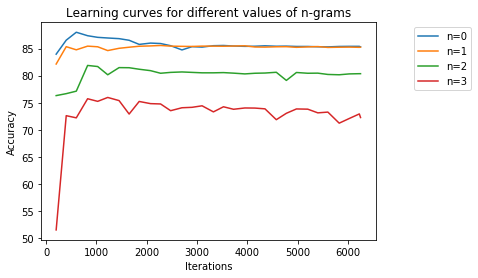

In [168]:
for i in range(len(curves_ngrams)):
    plt.plot(iterations,curves_ngrams[i],label='n='+str(i))
plt.legend(bbox_to_anchor=(1.3, 1))
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Learning curves for different values of n-grams')
plt.show()

# Optimization parameters

Here we'll first change the learning rate and see the impact of it on the accuracy. We'll do that for 1 gram first.

In [165]:
learning_rates=[0.001,0.005,0.01,0.05,0.1,0.5]

## Learning rate

### 1gram

In [170]:
val_lrates=[]
test_lrates=[]
for i in tqdm.trange(len(learning_rates)):
    lr=learning_rates[i]
    val_acc_lr,test_acc_lr=run(max_vocab_size=50000,learning_rate=lr)
    val_lrates.append(val_acc_lr)
    test_lrates.append(test_acc_lr)








  0%|          | 0/6 [00:00<?, ?it/s]

Epoch: [1/10], Step: [201/625], Validation Acc: 59.3
Epoch: [1/10], Step: [401/625], Validation Acc: 60.84
Epoch: [1/10], Step: [601/625], Validation Acc: 63.82
Epoch: [2/10], Step: [201/625], Validation Acc: 76.74
Epoch: [2/10], Step: [401/625], Validation Acc: 79.6
Epoch: [2/10], Step: [601/625], Validation Acc: 80.02
Epoch: [3/10], Step: [201/625], Validation Acc: 81.82
Epoch: [3/10], Step: [401/625], Validation Acc: 83.24
Epoch: [3/10], Step: [601/625], Validation Acc: 84.38
Epoch: [4/10], Step: [201/625], Validation Acc: 84.42
Epoch: [4/10], Step: [401/625], Validation Acc: 84.48
Epoch: [4/10], Step: [601/625], Validation Acc: 85.54
Epoch: [5/10], Step: [201/625], Validation Acc: 85.3
Epoch: [5/10], Step: [401/625], Validation Acc: 85.82
Epoch: [5/10], Step: [601/625], Validation Acc: 85.94
Epoch: [6/10], Step: [201/625], Validation Acc: 85.9
Epoch: [6/10], Step: [401/625], Validation Acc: 86.24
Epoch: [6/10], Step: [601/625], Validation Acc: 86.14
Epoch: [7/10], Step: [201/625], 








 17%|█▋        | 1/6 [09:54<49:31, 594.29s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 75.72
Epoch: [1/10], Step: [401/625], Validation Acc: 83.66
Epoch: [1/10], Step: [601/625], Validation Acc: 85.34
Epoch: [2/10], Step: [201/625], Validation Acc: 86.08
Epoch: [2/10], Step: [401/625], Validation Acc: 85.9
Epoch: [2/10], Step: [601/625], Validation Acc: 85.88
Epoch: [3/10], Step: [201/625], Validation Acc: 86.3
Epoch: [3/10], Step: [401/625], Validation Acc: 85.16
Epoch: [3/10], Step: [601/625], Validation Acc: 85.36
Epoch: [4/10], Step: [201/625], Validation Acc: 85.52
Epoch: [4/10], Step: [401/625], Validation Acc: 85.92
Epoch: [4/10], Step: [601/625], Validation Acc: 85.72
Epoch: [5/10], Step: [201/625], Validation Acc: 85.6
Epoch: [5/10], Step: [401/625], Validation Acc: 85.52
Epoch: [5/10], Step: [601/625], Validation Acc: 85.38
Epoch: [6/10], Step: [201/625], Validation Acc: 85.5
Epoch: [6/10], Step: [401/625], Validation Acc: 85.56
Epoch: [6/10], Step: [601/625], Validation Acc: 85.56
Epoch: [7/10], Step: [201/625],








 33%|███▎      | 2/6 [19:21<39:04, 586.21s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 81.46
Epoch: [1/10], Step: [401/625], Validation Acc: 84.92
Epoch: [1/10], Step: [601/625], Validation Acc: 85.86
Epoch: [2/10], Step: [201/625], Validation Acc: 85.52
Epoch: [2/10], Step: [401/625], Validation Acc: 85.5
Epoch: [2/10], Step: [601/625], Validation Acc: 85.54
Epoch: [3/10], Step: [201/625], Validation Acc: 85.18
Epoch: [3/10], Step: [401/625], Validation Acc: 85.18
Epoch: [3/10], Step: [601/625], Validation Acc: 85.06
Epoch: [4/10], Step: [201/625], Validation Acc: 85.16
Epoch: [4/10], Step: [401/625], Validation Acc: 85.16
Epoch: [4/10], Step: [601/625], Validation Acc: 85.26
Epoch: [5/10], Step: [201/625], Validation Acc: 85.32
Epoch: [5/10], Step: [401/625], Validation Acc: 85.26
Epoch: [5/10], Step: [601/625], Validation Acc: 85.28
Epoch: [6/10], Step: [201/625], Validation Acc: 85.24
Epoch: [6/10], Step: [401/625], Validation Acc: 85.26
Epoch: [6/10], Step: [601/625], Validation Acc: 85.32
Epoch: [7/10], Step: [201/62








 50%|█████     | 3/6 [28:52<29:04, 581.58s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 82.78
Epoch: [1/10], Step: [401/625], Validation Acc: 84.9
Epoch: [1/10], Step: [601/625], Validation Acc: 85.36
Epoch: [2/10], Step: [201/625], Validation Acc: 84.36
Epoch: [2/10], Step: [401/625], Validation Acc: 84.0
Epoch: [2/10], Step: [601/625], Validation Acc: 83.38
Epoch: [3/10], Step: [201/625], Validation Acc: 83.08
Epoch: [3/10], Step: [401/625], Validation Acc: 83.56
Epoch: [3/10], Step: [601/625], Validation Acc: 82.74
Epoch: [4/10], Step: [201/625], Validation Acc: 82.72
Epoch: [4/10], Step: [401/625], Validation Acc: 82.84
Epoch: [4/10], Step: [601/625], Validation Acc: 81.98
Epoch: [5/10], Step: [201/625], Validation Acc: 82.64
Epoch: [5/10], Step: [401/625], Validation Acc: 80.94
Epoch: [5/10], Step: [601/625], Validation Acc: 82.44
Epoch: [6/10], Step: [201/625], Validation Acc: 82.2
Epoch: [6/10], Step: [401/625], Validation Acc: 82.34
Epoch: [6/10], Step: [601/625], Validation Acc: 82.5
Epoch: [7/10], Step: [201/625],








 67%|██████▋   | 4/6 [38:30<19:21, 580.65s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 82.56
Epoch: [1/10], Step: [401/625], Validation Acc: 84.4
Epoch: [1/10], Step: [601/625], Validation Acc: 84.64
Epoch: [2/10], Step: [201/625], Validation Acc: 83.38
Epoch: [2/10], Step: [401/625], Validation Acc: 82.2
Epoch: [2/10], Step: [601/625], Validation Acc: 82.26
Epoch: [3/10], Step: [201/625], Validation Acc: 81.68
Epoch: [3/10], Step: [401/625], Validation Acc: 76.26
Epoch: [3/10], Step: [601/625], Validation Acc: 82.5
Epoch: [4/10], Step: [201/625], Validation Acc: 82.88
Epoch: [4/10], Step: [401/625], Validation Acc: 82.36
Epoch: [4/10], Step: [601/625], Validation Acc: 81.78
Epoch: [5/10], Step: [201/625], Validation Acc: 82.18
Epoch: [5/10], Step: [401/625], Validation Acc: 82.5
Epoch: [5/10], Step: [601/625], Validation Acc: 80.74
Epoch: [6/10], Step: [201/625], Validation Acc: 82.36
Epoch: [6/10], Step: [401/625], Validation Acc: 82.32
Epoch: [6/10], Step: [601/625], Validation Acc: 82.58
Epoch: [7/10], Step: [201/625],








 83%|████████▎ | 5/6 [49:22<10:01, 601.85s/it]


Epoch: [1/10], Step: [201/625], Validation Acc: 72.66
Epoch: [1/10], Step: [401/625], Validation Acc: 75.0
Epoch: [1/10], Step: [601/625], Validation Acc: 68.5
Epoch: [2/10], Step: [201/625], Validation Acc: 81.98
Epoch: [2/10], Step: [401/625], Validation Acc: 80.86
Epoch: [2/10], Step: [601/625], Validation Acc: 82.26
Epoch: [3/10], Step: [201/625], Validation Acc: 82.0
Epoch: [3/10], Step: [401/625], Validation Acc: 78.38
Epoch: [3/10], Step: [601/625], Validation Acc: 80.64
Epoch: [4/10], Step: [201/625], Validation Acc: 79.24
Epoch: [4/10], Step: [401/625], Validation Acc: 81.24
Epoch: [4/10], Step: [601/625], Validation Acc: 81.64
Epoch: [5/10], Step: [201/625], Validation Acc: 82.56
Epoch: [5/10], Step: [401/625], Validation Acc: 82.4
Epoch: [5/10], Step: [601/625], Validation Acc: 82.62
Epoch: [6/10], Step: [201/625], Validation Acc: 83.2
Epoch: [6/10], Step: [401/625], Validation Acc: 82.72
Epoch: [6/10], Step: [601/625], Validation Acc: 81.1
Epoch: [7/10], Step: [201/625], V








100%|██████████| 6/6 [1:18:30<00:00, 945.86s/it]








#### Accuracy vs learning rate after 10 epochs

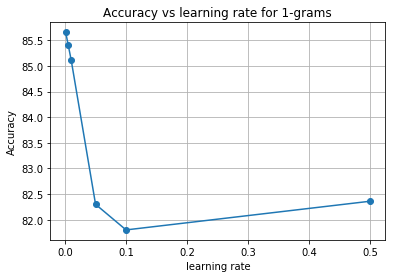

In [176]:
plt.plot((learning_rates),val_lrates,label='Validation accuracy',marker="o")
plt.xlabel('learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs learning rate for 1-grams')
plt.grid()

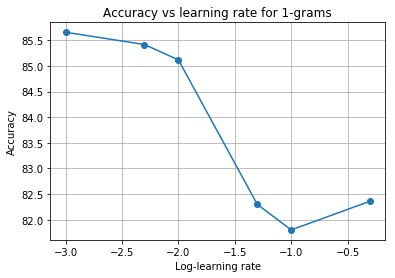

In [183]:
plt.plot(np.log10(learning_rates),val_lrates,label='Validation accuracy',marker="o")
plt.xlabel('Log-learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs learning rate for 1-grams')
plt.grid()

#### Accuracy vs learning rate during training (training curve)

In [172]:
lr_1g_001=[59.3,60.84,63.82,76.74,79.6,80.02,81.82,
           83.24,84.38,84.42,84.48,85.54,85.3,85.82,
           85.94,85.9,86.24,86.14,85.82,85.94,85.94,
           85.88,86.08,85.86,85.94,85.52,85.54,85.76,
           85.62,85.72,val_lrates[0]]


lr_1g_005=[75.72,83.66,85.34,86.08,85.9,85.88,86.3,
           85.16,85.36,85.52,85.92,85.72,85.6,85.52,
           85.38,85.5,85.56,85.56,85.42,85.48,85.5,
           85.52,85.44,85.46,85.44,85.54,85.48,85.44,
           85.44,85.36,val_lrates[1]]

lr_1g_01=[81.46,84.92,85.86,85.52,85.5,85.54,85.18,
          85.18,85.06,85.16,85.16,85.26,85.32,85.26,
          85.28,85.24,85.26,85.32,85.4,85.14,85.2,
          85.26,85.18,85.18,85.16,85.14,85.18,85.2,
          85.16,85.2,val_lrates[2]]


lr_1g_05=[82.78,84.9,85.36,84.36,84.0,83.38,83.08,
          83.56,82.74,82.72,82.84,81.98,82.64,80.94,
          82.44,82.2,82.34,82.5,82.64,82.88,82.78,
          82.92,82.86,81.02,82.4,82.48,82.5,82.68,
          81.96,82.1,val_lrates[3]]

lr_1g_1=[82.56,84.4,84.64,83.38,82.2,82.26,81.68,
         76.26,82.5,82.88,82.36,81.78,82.18,82.5,
         80.74,82.36,82.32,82.58,82.76,81.4,82.14,
         82.48,82.22,81.88,82.5,82.9,82.32,82.66,
         82.64,82.3,val_lrates[4]]

lr_1g_5=[72.66,75.0,68.5,81.98,80.86,82.26,82.0,
         78.38,80.64,79.24,81.24,81.64,82.56,82.4,
         82.62,83.2,82.72,81.1,82.98,82.32,82.74,82.68,
         83.0,82.92,82.8,83.2,82.18,82.48,82.48,82.7,val_lrates[5]]

learning_curves_lr_1g=[lr_1g_001,lr_1g_005,lr_1g_01,lr_1g_05,lr_1g_1,lr_1g_5]

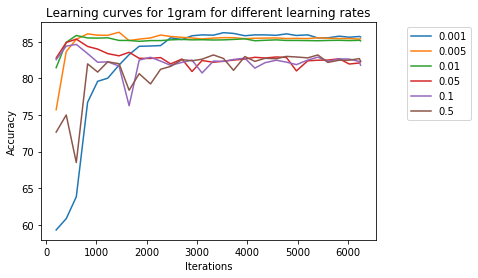

In [174]:
for i in range(len(learning_rates)):
    plt.plot(iterations,learning_curves_lr_1g[i],label=str(learning_rates[i]))
plt.legend(bbox_to_anchor=(1.3, 1))
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Learning curves for 1gram for different learning rates')
plt.show()

## Optimizer (SGD vs Adam)

## We create a new function SGD run where we modify the optimizer (line 209)

In [185]:
from collections import Counter
import os
import random
import math
import tqdm
import numpy as np


# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1
def run_SGD(max_vocab_size=10000, MAX_SENTENCE_LENGTH = 200, BATCH_SIZE = 32, 
        emb_dim = 100, learning_rate = 0.01, num_epochs = 10):


    def build_vocab(all_tokens):
        # Returns:
        # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
        # token2id: dictionary where keys represent tokens and corresponding values represent indices
        token_counter = Counter(all_tokens)
        vocab, count = zip(*token_counter.most_common(max_vocab_size))
        id2token = list(vocab)
        token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
        id2token = ['<pad>', '<unk>'] + id2token
        token2id['<pad>'] = PAD_IDX 
        token2id['<unk>'] = UNK_IDX
        return token2id, id2token

    # convert token to id in the dataset
    def token2index_dataset(tokens_data):
        indices_data = []
        for tokens in tokens_data:
            index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
            indices_data.append(index_list)
        return indices_data


    import numpy as np
    import torch
    from torch.utils.data import Dataset

    class NewsGroupDataset(Dataset):
        """
        Class that represents a train/validation/test dataset that's readable for PyTorch
        Note that this class inherits torch.utils.data.Dataset
        """

        def __init__(self, data_list, target_list):
            """
            @param data_list: list of newsgroup tokens 
            @param target_list: list of newsgroup targets 

            """
            self.data_list = data_list
            self.target_list = target_list
            assert (len(self.data_list) == len(self.target_list))

        def __len__(self):
            return len(self.data_list)

        def __getitem__(self, key):
            """
            Triggered when you call dataset[i]
            """

            token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
            label = self.target_list[key]
            return [token_idx, len(token_idx), label]

    def newsgroup_collate_func(batch):
        """
        Customized function for DataLoader that dynamically pads the batch so that all 
        data have the same length
        """
        data_list = []
        label_list = []
        length_list = []
        #print("collate batch: ", batch[0][0])
        #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
        for datum in batch:
            label_list.append(datum[2])
            length_list.append(datum[1])
        # padding
        for datum in batch:
            padded_vec = np.pad(np.array(datum[0]), 
                                    pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                    mode="constant", constant_values=0)
            data_list.append(padded_vec)
        return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

    token2id, id2token = build_vocab(all_train_tokens)

    # convert token to id in the dataset

    train_data_indices = token2index_dataset(train_data_tokens)
    val_data_indices = token2index_dataset(val_data_tokens)
    test_data_indices = token2index_dataset(test_data_tokens)

    import numpy as np
    import torch
    from torch.utils.data import Dataset

    class NewsGroupDataset(Dataset):
        """
        Class that represents a train/validation/test dataset that's readable for PyTorch
        Note that this class inherits torch.utils.data.Dataset
        """

        def __init__(self, data_list, target_list):
            """
            @param data_list: list of newsgroup tokens 
            @param target_list: list of newsgroup targets 

            """
            self.data_list = data_list
            self.target_list = target_list
            assert (len(self.data_list) == len(self.target_list))

        def __len__(self):
            return len(self.data_list)

        def __getitem__(self, key):
            """
            Triggered when you call dataset[i]
            """

            token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
            label = self.target_list[key]
            return [token_idx, len(token_idx), label]

    def newsgroup_collate_func(batch):
        """
        Customized function for DataLoader that dynamically pads the batch so that all 
        data have the same length
        """
        data_list = []
        label_list = []
        length_list = []
        #print("collate batch: ", batch[0][0])
        #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
        for datum in batch:
            label_list.append(datum[2])
            length_list.append(datum[1])
        # padding
        for datum in batch:
            padded_vec = np.pad(np.array(datum[0]), 
                                    pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                    mode="constant", constant_values=0)
            data_list.append(padded_vec)
        return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

    train_dataset = NewsGroupDataset(train_data_indices, train_target)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    val_dataset = NewsGroupDataset(val_data_indices, val_target)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    test_dataset = NewsGroupDataset(test_data_indices, test_target)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=False)

    import torch
    import torch.nn as nn
    import torch.nn.functional as F

    class BagOfWords(nn.Module):
        """
        BagOfWords classification model
        """
        def __init__(self, vocab_size, emb_dim):
            """
            @param vocab_size: size of the vocabulary. 
            @param emb_dim: size of the word embedding
            """
            super(BagOfWords, self).__init__()
            # pay attention to padding_idx 
            self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
            self.linear = nn.Linear(emb_dim,20)

        def forward(self, data, length):
            """

            @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
                review that is represented using n-gram index. Note that they are padded to have same length.
            @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
                length of each sentences in the data.
            """
            out = self.embed(data)
            out = torch.sum(out, dim=1)
            out /= length.view(length.size()[0],1).expand_as(out).float()

            # return logits
            out = self.linear(out.float())
            return out

    model = BagOfWords(len(id2token), emb_dim)


    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss()  
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # Function for testing the model
    def test_model(loader, model):
        """
        Help function that tests the model's performance on a dataset
        @param: loader - data loader for the dataset to test against
        """
        correct = 0
        total = 0
        model.eval()
        for data, lengths, labels in loader:
            data_batch, length_batch, label_batch = data, lengths, labels
            outputs = F.softmax(model(data_batch, length_batch), dim=1)
            predicted = outputs.max(1, keepdim=True)[1]

            total += labels.size(0)
            correct += predicted.eq(labels.view_as(predicted)).sum().item()
        return (100 * correct / total)
    val_hist=[]
    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 200 iterations
            if i > 0 and i % 200 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                val_hist.append(val_acc)
                print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))
    return test_model(val_loader, model), test_model(test_loader, model),val_hist



In [187]:
val_acc_SGD,test_acc_SGD,acc_hist_SGD=run_SGD(max_vocab_size=50000,learning_rate=0.01)

Epoch: [1/10], Step: [201/625], Validation Acc: 51.44
Epoch: [1/10], Step: [401/625], Validation Acc: 53.16
Epoch: [1/10], Step: [601/625], Validation Acc: 56.44
Epoch: [2/10], Step: [201/625], Validation Acc: 57.9
Epoch: [2/10], Step: [401/625], Validation Acc: 58.6
Epoch: [2/10], Step: [601/625], Validation Acc: 59.14
Epoch: [3/10], Step: [201/625], Validation Acc: 60.38
Epoch: [3/10], Step: [401/625], Validation Acc: 60.8
Epoch: [3/10], Step: [601/625], Validation Acc: 60.9
Epoch: [4/10], Step: [201/625], Validation Acc: 61.38
Epoch: [4/10], Step: [401/625], Validation Acc: 61.34
Epoch: [4/10], Step: [601/625], Validation Acc: 62.04
Epoch: [5/10], Step: [201/625], Validation Acc: 62.3
Epoch: [5/10], Step: [401/625], Validation Acc: 62.5
Epoch: [5/10], Step: [601/625], Validation Acc: 62.72
Epoch: [6/10], Step: [201/625], Validation Acc: 62.7
Epoch: [6/10], Step: [401/625], Validation Acc: 63.02
Epoch: [6/10], Step: [601/625], Validation Acc: 63.26
Epoch: [7/10], Step: [201/625], Val

In [190]:
val_acc_ADAM,test_acc_ADAM=run()

Epoch: [1/10], Step: [201/625], Validation Acc: 81.8
Epoch: [1/10], Step: [401/625], Validation Acc: 84.58
Epoch: [1/10], Step: [601/625], Validation Acc: 86.2
Epoch: [2/10], Step: [201/625], Validation Acc: 85.6
Epoch: [2/10], Step: [401/625], Validation Acc: 85.46
Epoch: [2/10], Step: [601/625], Validation Acc: 85.56
Epoch: [3/10], Step: [201/625], Validation Acc: 85.3
Epoch: [3/10], Step: [401/625], Validation Acc: 85.28
Epoch: [3/10], Step: [601/625], Validation Acc: 84.68
Epoch: [4/10], Step: [201/625], Validation Acc: 85.26
Epoch: [4/10], Step: [401/625], Validation Acc: 85.3
Epoch: [4/10], Step: [601/625], Validation Acc: 85.36
Epoch: [5/10], Step: [201/625], Validation Acc: 85.32
Epoch: [5/10], Step: [401/625], Validation Acc: 85.4
Epoch: [5/10], Step: [601/625], Validation Acc: 85.46
Epoch: [6/10], Step: [201/625], Validation Acc: 85.42
Epoch: [6/10], Step: [401/625], Validation Acc: 85.52
Epoch: [6/10], Step: [601/625], Validation Acc: 85.36
Epoch: [7/10], Step: [201/625], Va

In [191]:
print(val_acc_ADAM)
print(val_acc_SGD)

85.34
64.36


# FINAL MODEL

In [12]:
run(max_vocab_size=50000,MAX_SENTENCE_LENGTH=400)

Epoch: [1/10], Step: [201/625], Validation Acc: 86.04
Epoch: [1/10], Step: [401/625], Validation Acc: 87.56
Epoch: [1/10], Step: [601/625], Validation Acc: 88.28
Epoch: [2/10], Step: [201/625], Validation Acc: 88.74
Epoch: [2/10], Step: [401/625], Validation Acc: 89.0
Epoch: [2/10], Step: [601/625], Validation Acc: 87.92
Epoch: [3/10], Step: [201/625], Validation Acc: 88.22
Epoch: [3/10], Step: [401/625], Validation Acc: 87.78
Epoch: [3/10], Step: [601/625], Validation Acc: 87.26
Epoch: [4/10], Step: [201/625], Validation Acc: 87.94
Epoch: [4/10], Step: [401/625], Validation Acc: 87.78
Epoch: [4/10], Step: [601/625], Validation Acc: 87.68
Epoch: [5/10], Step: [201/625], Validation Acc: 87.54
Epoch: [5/10], Step: [401/625], Validation Acc: 87.56
Epoch: [5/10], Step: [601/625], Validation Acc: 87.54
Epoch: [6/10], Step: [201/625], Validation Acc: 87.38
Epoch: [6/10], Step: [401/625], Validation Acc: 87.5
Epoch: [6/10], Step: [601/625], Validation Acc: 87.24
Epoch: [7/10], Step: [201/625]

(87.4, 84.976)

In [13]:
test_accuracy=84.976

So the test accuracy we get is 84.976